# Assignment 2

### Implement linear regression using pytorch.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable

import os
from sklearn.model_selection import train_test_split

# Import data
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/MyDrive/Colab Notebooks/Artificial Neural Networks/Assignment Linear Regression/ex2data1.txt"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Read comma separated data
data = np.loadtxt(os.path.join('Data', path ), delimiter=',')
X, Y = data[:, 0], data[:, 1]

# Normalize data
x_train = np.array(X, dtype=np.float32)
x_train = x_train.reshape(-1, 1)

y_train = np.array(Y, dtype=np.float32)
y_train = y_train.reshape(-1, 1)

In [ ]:
# Create class
class linearRegression(torch.nn.Module):
    def __init__(self, inputSize, outputSize):
        super(linearRegression, self).__init__()
        self.linear = torch.nn.Linear(inputSize, outputSize)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Define parameters
inputDim = 1        # takes variable 'x'
outputDim = 1       # takes variable 'y'
learningRate = 0.01
epochs = 1500

model = linearRegression(inputDim, outputDim)

##### For GPU #######
if torch.cuda.is_available():
    model.cuda()

In [ ]:
# Define loss function and optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

In [ ]:
for epoch in range(epochs):
    # Converting inputs and labels to Variable
    if torch.cuda.is_available():
        inputs = Variable(torch.from_numpy(x_train).cuda())
        labels = Variable(torch.from_numpy(y_train).cuda())
    else:
        inputs = Variable(torch.from_numpy(x_train))
        labels = Variable(torch.from_numpy(y_train))

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)
    #print(loss)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    #print('epoch {}, loss {}'.format(epoch, loss.item()))

In [ ]:
with torch.no_grad(): # we don't need gradients in the testing phase
    if torch.cuda.is_available():
        predicted = model(Variable(torch.from_numpy(x_train).cuda())).cpu().data.numpy()
    else:
        predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
    #print(predicted)

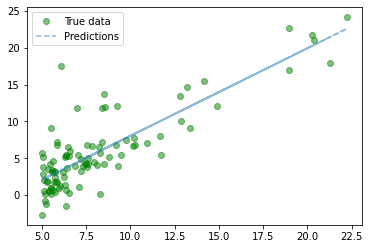

In [ ]:
# Plot graph
plt.clf()
plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()